<a href="https://colab.research.google.com/github/komal-pasi/Supervised-ML---Regression/blob/main/Demand_Prediction_for_Public_Transport_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

In [2]:
#Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Copy file location
data = pd.read_csv("/content/drive/MyDrive/Capstone ML - 1/train_revised.csv")

In [5]:
data.shape

(51645, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [7]:
data.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [8]:
data.tail()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49


In [9]:
def Detailed_info(DataFrame):
  '''This Function will give detailed information with clearity about the DataFrame it will provide:
      1.Columns name,2.Data type,3.Unique in Data frame,4.Total nulls,5.Not Nulls,6.Percentage of Nulls
  '''

  info = pd.DataFrame(index=DataFrame.columns)
   
  info['dtype'] = DataFrame.dtypes
    
  info['Unique'] = DataFrame.nunique()
  
  info['Num_ofNullValues'] = DataFrame.isnull().sum()
 
  info['Num_nonNullValues'] = DataFrame.count()
  return info

In [10]:
Detailed_info(data)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues
ride_id,int64,6249,0,51645
seat_number,object,61,0,51645
payment_method,object,2,0,51645
payment_receipt,object,51645,0,51645
travel_date,object,149,0,51645
travel_time,object,78,0,51645
travel_from,object,17,0,51645
travel_to,object,1,0,51645
car_type,object,2,0,51645
max_capacity,int64,2,0,51645


In [11]:
#Count the id,s and map them with given id number.
ride_id_dict = {} 
for ride_id in data["ride_id"]:
    if not ride_id in ride_id_dict:
        ride_id_dict[ride_id] = 1
    else:
        ride_id_dict[ride_id] += 1

In [12]:
#length of dictionary and length of ride_id unique should be same
display(len(ride_id_dict),len(data.ride_id.unique()))

6249

6249

In [13]:
#drop all the duplicates
data.drop_duplicates(subset="ride_id",inplace=True)
data.reset_index(drop= True, inplace=True)

In [14]:
#store the dictionary as per the ride_id
for i in range(len(data)):
    ride_id = data.loc[i]["ride_id"]
    data.at[i,"Bookings"] = ride_id_dict[ride_id]

In [15]:
data.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,Bookings
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1.0
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1.0
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1.0
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5.0
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31.0


## **Basic Feature Selection**

Uniue Value Features

In [16]:
#check unique counts of features
print(f"Total values counts of ride_id:-{len(data.ride_id.unique())}")
print(f"Total values counts of payment_receipt:-{len(data.payment_receipt.unique())}")

Total values counts of ride_id:-6249
Total values counts of payment_receipt:-6249


In [17]:
#check value count
print(data.payment_method.value_counts())
print("\n")
print(data.travel_to.value_counts())

Mpesa    6211
Cash       38
Name: payment_method, dtype: int64


Nairobi    6249
Name: travel_to, dtype: int64


In [18]:
#one_hot encoding
Dummy=pd.get_dummies(data["car_type"])

In [20]:
#concate
check=pd.concat([Dummy,data[["max_capacity","Bookings"]]],axis=1)

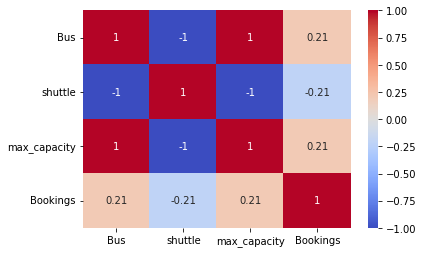

In [21]:
#Heat map to check correlation
sns.heatmap(check.corr(),cmap='coolwarm',annot=True)
plt.show()

In [25]:
#Drop features from above observation
data.drop(data[["travel_to","ride_id","payment_receipt","car_type","seat_number","payment_method"]],axis=1,inplace=True)